## 作业要求
----
- 共两个题目，代码参考课上代码即可
- 本代码仅为参考代码，需要填写代码的地方已用`#===============`标识
- __只要求得到类似结果即可，不一定非要用本代码__
- 将本notebook导出为`.html`文件(File --> Download as --> (.html)),并把`.html`发送到课程邮箱

## 1. 基础图像绘制

In [1]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pth

`X`和`Y1/Y2/y_const`均为shape为`(100,)`的数据

要求：

- 以`X`为横坐标，`Y1/Y2`为纵坐标，绘制折线图
- 设置折线颜色（任意）
- 添加标题（任意）
- 添加坐标label（任意）
- 填充`Y1`和`Y2`之间的区域
- 绘制`y_const=80`的直线，颜色为红色
- 标识出`y_const=80`直线与`Y2`交点
- 添加`Y1/Y2/y_const`曲线的`legend()`
- 保存绘制的图片
- 可以添加其他样式，不要拘束于上面要求
- 参考结果（仅供参考，结果不需要和下图完全一致）：
![1](data/results-1.jpg)

In [2]:
# 创建数据
N = 100
X = np.arange(N)
Y1 = np.sqrt(np.arange(N)) * 11 + np.random.rand(N) * 10
Y2 = (np.sqrt(np.arange(N)) * 9).astype(int)
y_const = np.ones_like(X) * 80
print(X.shape, Y1.shape, Y2.shape, y_const.shape)

(100,) (100,) (100,) (100,)


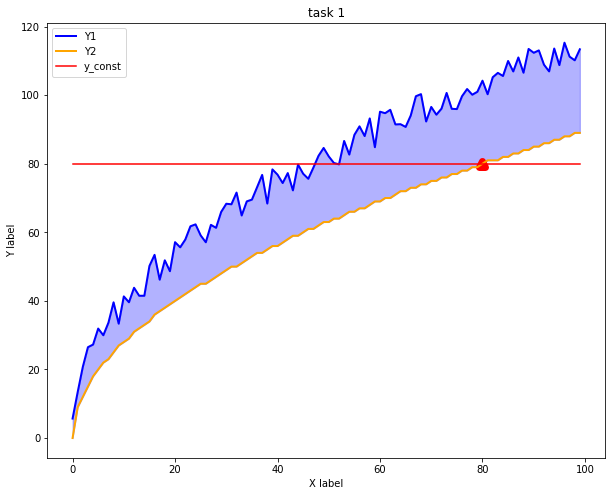

In [3]:
plt.figure(figsize=[10, 8])

# 1. Y1/Y2-X折线图
# ===========填写代码处，下类似============
plt.plot(X, Y1, color="blue", linewidth=2, label='Y1')
plt.plot(X, Y2, color="orange", linewidth=2, label="Y2")
# ======================================

# 2. 添加标题坐标label
# ======================================
plt.title("task 1")
plt.xlabel("X label")
plt.ylabel("Y label")
# ======================================

#　3. y_const直线
# ======================================
plt.plot(X, y_const, color="red", label="y_const")
# ======================================

# 4. 填充Y1和Y2之间区域
# ======================================
plt.fill_between(X, Y1, Y2, color='blue', alpha=0.3)
# ======================================

# 5. 标出y_const与Y2交点
# ======================================
for index, y2 in enumerate(Y2):
    if y2 == y_const[0]:
        break;
intersection = (X[index], y_const[0])
plt.scatter(intersection[0], intersection[1], c="red", marker="^", linewidths=7)
# ======================================

# 6. 添加图示legend
plt.legend(loc='upper left')

# 7. 保存绘制的图片
# ======================================
plt.savefig("task1.png")
# ======================================

## 2. 图像可视化

要求：
- 参考课上代码，在原图上将mask、boundingbox框、关节点等画在一张图片上
- 关节点显示数量不少于７个，关节之间的连接关系可以自定义
- 可以自定义颜色等参数
- 参考结果(仅供参考，结果不需要和下图完全一致)：
![res](data/results-2.jpg)

In [4]:
# 读取数据

# 图片
img = cv2.imread('data/1.jpg')[:, :, ::-1]  # 转化BGR为RGB
print("image`s shape:", img.shape)

# boundingbox
box = np.load('data/box.npy')
print("box`s shape:", box.shape)

# mask
mask = np.load('data/mask.npy')
print("mask`s shape:", mask.shape)

# keypoints
kps = np.load('data/kps.npy')
print("kps`s shape:", kps.shape)

image`s shape: (224, 200, 3)
box`s shape: (2, 2)
mask`s shape: (224, 200)
kps`s shape: (14, 2)


`kps`为`14x2`的`ndarray`格式，共14个关节点，每个关节点有2个量，`[x, y]`。

14个关节点名称顺序为：

```
0 - Right ankle
1 - Right knee
2 - Right hip
3 - Left hip
4 - Left knee
5 - Left ankle
6 - Right wrist
7 - Right elbow
8 - Right shoulder
9 - Left shoulder
10 - Left elbow
11 - Left wrist
12 - Neck
13 - Head top
```

(224, 200, 3)


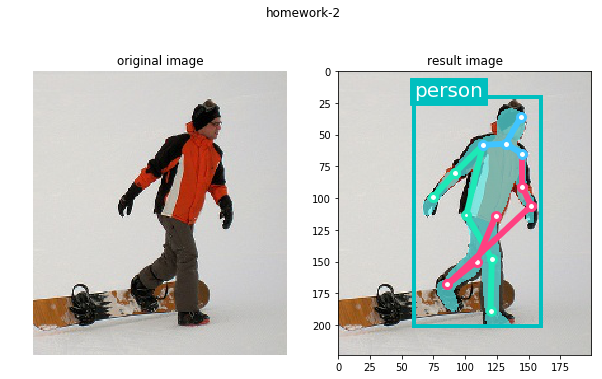

In [5]:
plt.figure(figsize=[10, 6])
plt.suptitle('homework-2')

plt.subplot(121)
# 显示原图
plt.imshow(img)
plt.title('original image')
plt.axis('off')

plt.subplot(122)
plt.title('result image')
# 1．处理获取mask和原图融合后的图片img_mask
# ===========填写代码除，下类似============
color_mask = cv2.applyColorMap((mask * 255.).astype(np.uint8), cv2.COLORMAP_SUMMER)
alpha = 0.65
mask_idx = (mask == 1)
img_mask = img.copy()
img_mask[mask_idx] = img_mask[mask_idx] * (1. - alpha) + color_mask[mask_idx] * alpha
print(np.shape(img_mask))
# ======================================

# 2．显示img_mask
# =====================================
plt.imshow(img_mask)
# =====================================

# 3．显示box框
# =====================================
ax = plt.gca()
rec = pth.Rectangle(box[0], 
                    box[1][0] - box[0][0], 
                    box[1][1] - box[0][1], 
                    facecolor='none', edgecolor='c', linewidth=4)
ax.add_patch(rec)

# 添加文字框
plt.text(box[0, 0], 
         box[0, 1], 
         "person", 
         size=20,
         fontdict=dict(color='w'),
         bbox=dict(edgecolor='c',
                   facecolor='c')
        )
# =====================================

# 4．显示关节点
# =====================================
# 右上肢
plt.plot(kps[6:8, 0], kps[6:8, 1], c='#1de9b6', 
         linewidth=6, markersize=8, marker='o', markeredgewidth=3, markerfacecolor='w')
plt.plot(kps[7:9, 0], kps[7:9, 1], c='#1de9b6', 
         linewidth=6, markersize=8, marker='o', markeredgewidth=3, markerfacecolor='w')
# 右下肢
plt.plot(kps[0: 3, 0], kps[0: 3, 1], c='#1de9b6',
        linewidth=6, markersize=8, marker='o', markeredgewidth=3, markerfacecolor='w')
plt.plot([kps[2, 0], kps[8, 0]], [kps[2, 1], kps[8, 1]], c='#1de9b6',
         linewidth=6, marker='o', markeredgewidth=3, markerfacecolor='w')


# 左上肢
plt.plot(kps[9:11, 0], kps[9:11, 1], c='#ff4081', 
         linewidth=6, markersize=8, marker='o', markeredgewidth=3, markerfacecolor='w')
plt.plot(kps[10:12, 0], kps[10:12, 1], c='#ff4081', 
         linewidth=6, markersize=8, marker='o', markeredgewidth=3, markerfacecolor='w')
# 左下肢
plt.plot(kps[3: 6, 0], kps[3: 6, 1], c='#ff4081', 
        linewidth=6, markersize=8, marker='o', markeredgewidth=3, markerfacecolor='w')
plt.plot([kps[5, 0], kps[11, 0]], [kps[5, 1], kps[11, 1]], c='#ff4081', 
        linewidth=6, markersize=8, marker='o', markeredgewidth=3, markerfacecolor='w')

# 头
plt.plot(kps[12:14, 0], kps[12:14, 1], c='#40c4ff', 
         linewidth=6, markersize=8, marker='o', markeredgewidth=3, markerfacecolor='w')
plt.plot([kps[8, 0], kps[12, 0]], [kps[8, 1], kps[12, 1]], c='#40c4ff', 
         linewidth=6, markersize=8, marker='o', markeredgewidth=3, markerfacecolor='w')
plt.plot([kps[9, 0], kps[12, 0]], [kps[9, 1], kps[12, 1]], c='#40c4ff', 
         linewidth=6, markersize=8, marker='o', markeredgewidth=3, markerfacecolor='w')
# =====================================